In [16]:
import pandas as pd
import numpy as np
import math
from sklearn import linear_model
import matplotlib.pyplot as plot

In [17]:
def extract(x):
    x = x.split(" ")[2]
    return math.floor(float(x))

In [18]:
population = pd.read_csv("SD1970_population.csv")

In [19]:
#Filter by San Diego
population = population[population["Place Name"] == "San Diego"]

In [20]:
#Select (white, black, indian, other specified race, report)
df = population[population.columns[0:2]]
population = population[population.columns[80:85]]
population = population.replace('...', "0")
population1 = df.join(population)
population1

,Census Tract Name,Block Group,White persons,Black persons,Indian persons,Other specified race persons,"Reported ""other race"" persons"
0,Census Tract 1,1,883,0,0,18,0
1,Census Tract 1,2,673,2,0,8,0
2,Census Tract 1,3,529,0,1,0,2
3,Census Tract 1,4,415,0,4,2,0
4,Census Tract 1,5,483,3,0,1,2
...,...,...,...,...,...,...,...
918,Census Tract 141,1,0,0,0,0,0
921,Census Tract 141,3,689,7,0,0,1
923,Census Tract 141,4,570,195,3,24,4
928,Census Tract 142,4,62,0,0,9,0


In [21]:
population["White persons"] = population["White persons"].str.replace(r'[^\w\s]+', '')
population["White persons"] = population["White persons"].astype(int)

population["Black persons"] = population["Black persons"].str.replace(r'[^\w\s]+', '')
population["Black persons"] = population["Black persons"].astype(int)

population["Indian persons"] = population["Indian persons"].str.replace(r'[^\w\s]+', '')
population["Indian persons"] = population["Indian persons"].astype(int)

population["Other specified race persons"] = population["Other specified race persons"].str.replace(r'[^\w\s]+', '')
population["Other specified race persons"] = population["Other specified race persons"].astype(int)

population['Reported "other race" persons'] = population['Reported "other race" persons'].str.replace(r'[^\w\s]+', '')
population['Reported "other race" persons'] = population['Reported "other race" persons'].astype(int)


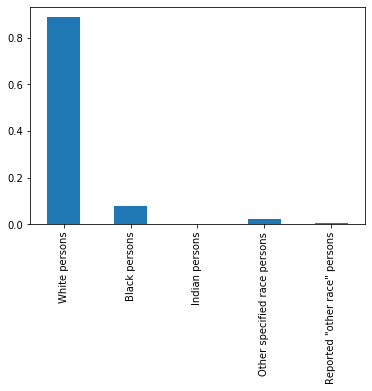

In [22]:
#Sum the population
summary = population.sum() / population.sum().sum()
# #Plot the distribution by race
summary.plot.bar()